In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import random
import spotipy
import json
import warnings
import sklearn.preprocessing
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from spotipy.oauth2 import SpotifyClientCredentials



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [4]:
data = data[:-154389]
data.shape


(20000, 19)

In [5]:
print("---------- Data NA:")
print(data.isna().sum())
print("---------- Data null:")
print(data.isnull().sum())

---------- Data NA:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64
---------- Data null:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


In [6]:
data = data.set_index("name")


In [7]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,12,1920,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,7,1920-01-05,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,4,1920,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,"['Lange', 'Andy Moor', 'Stadium4']",0.439,203612,0.937,0,2Cu7GOgViPVDx9QmhWOrIm,0.895000,11,0.3300,-10.203,0,0,2021-01-22,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,['Bad Bunny'],0.811,130014,0.637,1,5RubKOuDoPn5Kj5TLVxSxY,0.000572,10,0.1180,-4.835,0,90,2020-11-27,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,['Above & Beyond'],0.646,206748,0.792,0,4WxGMzTRECd5KMfPUPUAjZ,0.547000,7,0.2390,-8.355,1,0,2021-01-22,0.0358,130.012,0.4270,2021


In [8]:
num = data.select_dtypes(np.number)


In [9]:
num

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0,0.895000,11,0.3300,-10.203,0,0,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,0.811,130014,0.637,1,0.000572,10,0.1180,-4.835,0,90,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0,0.547000,7,0.2390,-8.355,1,0,0.0358,130.012,0.4270,2021


In [10]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.525564,0.552576,2.215271e+05,0.465127,0.071100,0.161390,5.183650,0.202078,-11.541631,0.719000,37.658950,0.097281,116.676079,0.550017,1970.407750
std,0.381800,0.169744,1.036479e+05,0.263658,0.256998,0.312065,3.481268,0.168593,5.319268,0.449499,25.940967,0.164314,30.440957,0.254885,29.233344
min,0.000000,0.000000,1.037100e+04,0.000020,0.000000,0.000000,0.000000,0.000000,-47.046000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.112000,0.436000,1.678498e+05,0.244000,0.000000,0.000000,2.000000,0.098200,-14.452250,0.000000,12.000000,0.034700,93.866500,0.349000,1945.000000
50%,0.579000,0.566000,2.002000e+05,0.438000,0.000000,0.000146,5.000000,0.136000,-10.860000,1.000000,45.000000,0.044900,114.817500,0.568000,1970.000000
75%,0.921000,0.679000,2.546068e+05,0.681000,0.000000,0.075800,8.000000,0.258000,-7.599000,1.000000,60.000000,0.073500,133.993250,0.759000,1995.000000
max,0.996000,0.988000,2.593268e+06,1.000000,1.000000,1.000000,11.000000,0.996000,0.878000,1.000000,96.000000,0.967000,221.741000,0.991000,2021.000000


In [11]:
X_prep = StandardScaler().fit_transform(num)


In [ ]:
scaler = StandardScaler().fit(num)
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [ ]:
joblib.dump(model, 'model.pkl')  
model_loaded = joblib.load('model.pkl')


In [12]:
pd.DataFrame(X_prep, columns=num.columns).head(20)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,1.219089,0.267611,-0.513232,-0.914565,-0.276663,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.989153,-0.022404,1.093946,0.329504,-1.724367
1,0.307594,1.764022,-0.688184,0.196749,-0.276663,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-1.181903,-0.267064,-0.978544,1.569312,-1.724367
2,1.224327,0.556289,-0.556707,-1.058694,-0.276663,-0.517125,-1.489049,1.879856,-0.104598,0.625156,-1.297553,0.466917,-0.626674,0.545293,-1.724367
3,-1.376123,1.045273,1.935060,1.262549,-0.276663,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.796403,-0.333403,0.371907,-1.992390,-1.724367
4,-0.603901,0.892098,-0.543228,0.917397,3.614512,-0.516393,1.383539,1.185858,1.035061,-1.599600,-1.374654,-0.124650,0.177394,-0.984850,-1.724367
5,1.232185,-0.757488,-0.220946,-0.834914,-0.276663,2.043248,-0.052755,0.195280,0.013467,0.625156,-1.104803,-0.350444,-0.420696,-0.286477,-1.724367
6,1.221708,1.351625,-0.254011,-1.546838,-0.276663,-0.517176,-0.052755,-0.154684,-0.171338,0.625156,-1.259003,-0.231765,-1.019181,-0.247242,-1.724367
7,1.232185,-0.462920,-0.341106,-0.857671,-0.276663,0.078864,1.096280,-0.041984,0.343971,0.625156,-1.451754,-0.416173,-1.244804,-0.721979,-1.724367
8,1.232185,-0.492376,-0.720602,-0.861464,-0.276663,2.559180,0.809021,-0.314837,-1.348973,0.625156,-1.451754,-0.141083,0.439679,0.278499,-1.724367
9,-1.358713,0.108544,2.458161,1.091869,-0.276663,2.280385,0.809021,-0.652939,0.864545,0.625156,-1.451754,-0.320622,0.338924,-1.691069,-1.724367


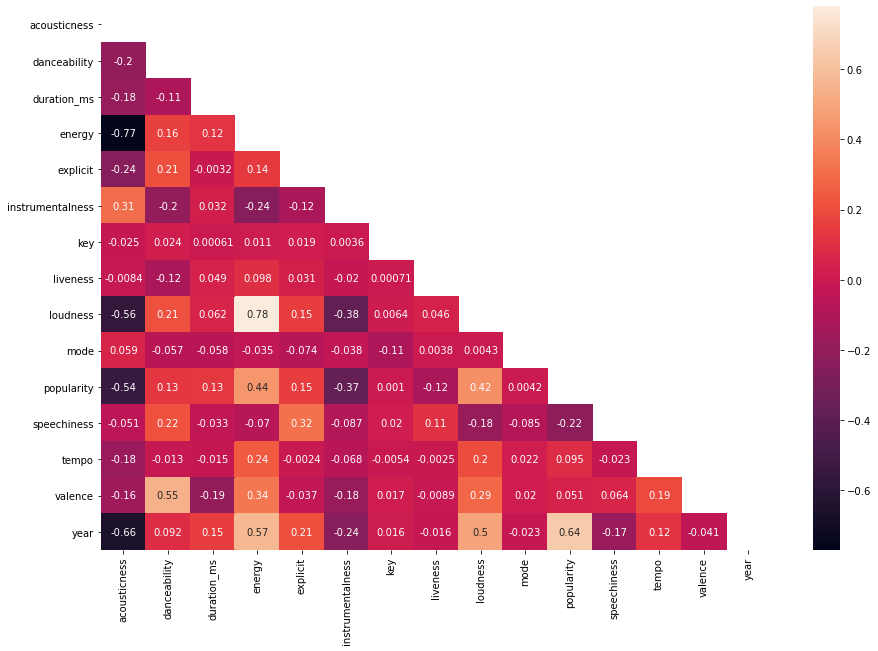

In [13]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=30, random_state=1234)
kmeans.fit(X_prep)


KMeans(n_clusters=30, random_state=1234)

In [15]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()


0      689
1     1147
2      852
3      895
4     1337
5      497
6      244
7     1037
8      843
9      254
10     457
11     626
12     811
13     814
14     704
15     550
16     397
17     801
18     409
19     841
20     764
21     913
22     789
23      21
24     203
25     722
26     733
27     159
28    1064
29     427
dtype: int64

In [16]:
X_df = pd.DataFrame(X_prep)
X_df["cluster"] = clusters
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
0,1.219089,0.267611,-0.513232,-0.914565,-0.276663,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.989153,-0.022404,1.093946,0.329504,-1.724367,7
1,0.307594,1.764022,-0.688184,0.196749,-0.276663,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-1.181903,-0.267064,-0.978544,1.569312,-1.724367,7
2,1.224327,0.556289,-0.556707,-1.058694,-0.276663,-0.517125,-1.489049,1.879856,-0.104598,0.625156,-1.297553,0.466917,-0.626674,0.545293,-1.724367,4
3,-1.376123,1.045273,1.935060,1.262549,-0.276663,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.796403,-0.333403,0.371907,-1.992390,-1.724367,10
4,-0.603901,0.892098,-0.543228,0.917397,3.614512,-0.516393,1.383539,1.185858,1.035061,-1.599600,-1.374654,-0.124650,0.177394,-0.984850,-1.724367,5


In [17]:
kmeans.inertia_

111063.46524741966

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

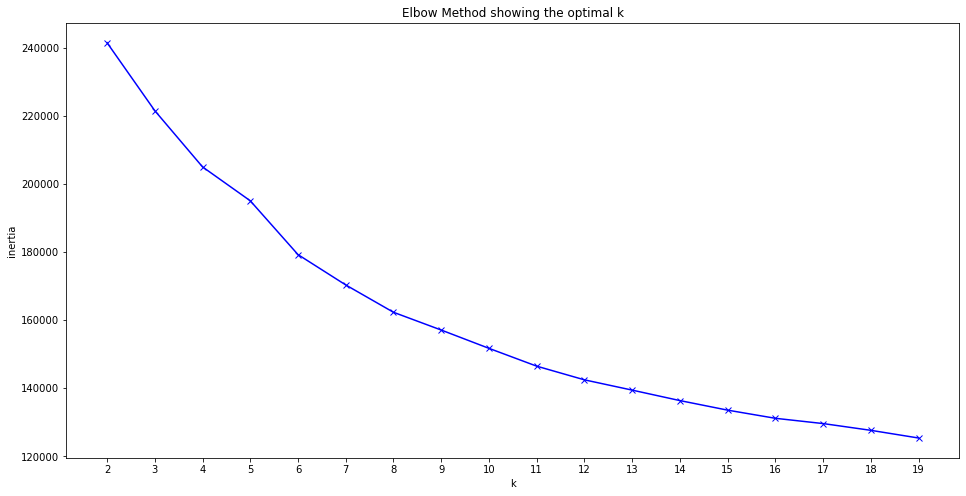

In [18]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

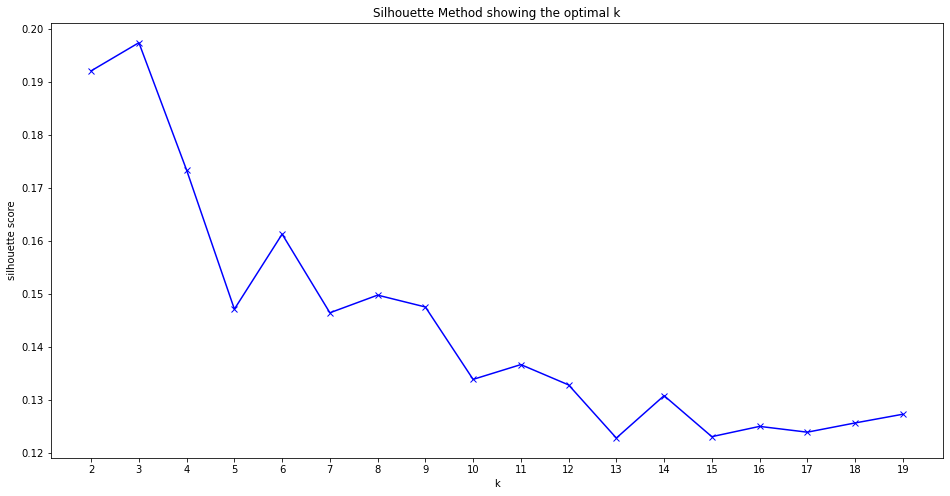

In [19]:
#from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [20]:
xx =[10,20,40,50,60]
yy =[3,5,7,9]
zz = [2,3,4,5]
ww = [0,1,2]
for x in xx:
    for y in yy:
        for z in zz:
            for w in ww:
            
                kmeans = KMeans(n_clusters=x,
                                init="random",
                                n_init=y,  # try with 1, 4, 8, 20, 30, 100...
                                max_iter=z,
                                tol=w,
                                algorithm="full",
                                random_state=1234)
                kmeans.fit(X_prep)
                if kmeans.inertia_ < 1000000:
                    print(x,y,z,w)
                    print(kmeans.inertia_)


10 3 2 0
162387.1775633103
10 3 2 1
162387.1775633103
10 3 2 2
162387.1775633103
10 3 3 0
158870.03743787517
10 3 3 1
158870.03743787517
10 3 3 2
161774.71154524438
10 3 4 0
156169.8524972759
10 3 4 1
156169.8524972759
10 3 4 2
156169.8524972759
10 3 5 0
154712.44878165808
10 3 5 1
156169.8524972759
10 3 5 2
156169.8524972759
10 5 2 0
162387.1775633103
10 5 2 1
162387.1775633103
10 5 2 2
162387.1775633103
10 5 3 0
158870.03743787517
10 5 3 1
158870.03743787517
10 5 3 2
161774.71154524438
10 5 4 0
156169.8524972759
10 5 4 1
156169.8524972759
10 5 4 2
156169.8524972759
10 5 5 0
154712.4487816581
10 5 5 1
156169.8524972759
10 5 5 2
156169.8524972759
10 7 2 0
162387.1775633103
10 7 2 1
162387.1775633103
10 7 2 2
162387.1775633103
10 7 3 0
158870.03743787517
10 7 3 1
158870.03743787517
10 7 3 2
161774.71154524438
10 7 4 0
156169.8524972759
10 7 4 1
156169.8524972759
10 7 4 2
156169.8524972759
10 7 5 0
154712.4487816581
10 7 5 1
155381.3863930072
10 7 5 2
156169.8524972759
10 9 2 0
162387.17

In [21]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=400,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

162291.54315850826


In [22]:
# creating a copy of the num dataset
df_cluster = num.copy()
df_cluster = df_cluster.iloc[:174389]

In [23]:
df_cluster

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0,0.895000,11,0.3300,-10.203,0,0,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,0.811,130014,0.637,1,0.000572,10,0.1180,-4.835,0,90,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0,0.547000,7,0.2390,-8.355,1,0,0.0358,130.012,0.4270,2021


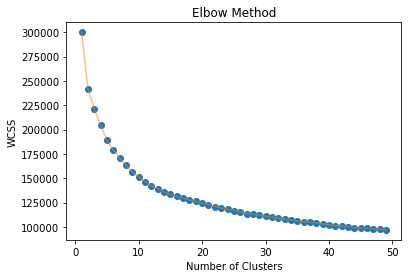

In [24]:
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,50), wcss, 'o')
plt.plot(range(1 , 50) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

# The number we're looking for is the position where the line starts to flatten, making it look like an elbow for the plot. 
# After some testing, I've figured out that 8 clusters yield better results.

In [25]:
wcss

[299999.9999999998,
 241455.20530794025,
 221495.8289387773,
 204463.22220816283,
 188907.6268397515,
 179229.70278928982,
 170568.234610219,
 163247.42300830726,
 156765.4927661707,
 151277.3249941777,
 146467.26675180875,
 142561.9129386291,
 139429.33030330998,
 135958.4513257503,
 133550.10922098733,
 131304.0532628007,
 129546.60422263603,
 127591.1668698622,
 126224.82569236429,
 124663.52444268031,
 122923.14515504106,
 121015.98359464441,
 119350.07756893021,
 118155.27018080094,
 116844.23602464791,
 115345.81125254465,
 113803.08960387287,
 112949.34741916589,
 112151.9168723529,
 110990.85103027962,
 110032.44489874438,
 109087.90313129836,
 108026.91118207973,
 107166.4897450191,
 106193.53377269975,
 105449.46295294492,
 104850.65894002284,
 104207.47791411319,
 103162.29835170138,
 102251.6810037776,
 101418.83567702684,
 100978.60658685234,
 100266.65225815774,
 99299.0220989319,
 98804.86179810218,
 98549.4220248001,
 98034.37848459456,
 97581.4755060596,
 96973.2767143

In [26]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_prep)

In [27]:
y_kmeans.shape

(20000,)

In [28]:
X_prep.shape

(20000, 15)

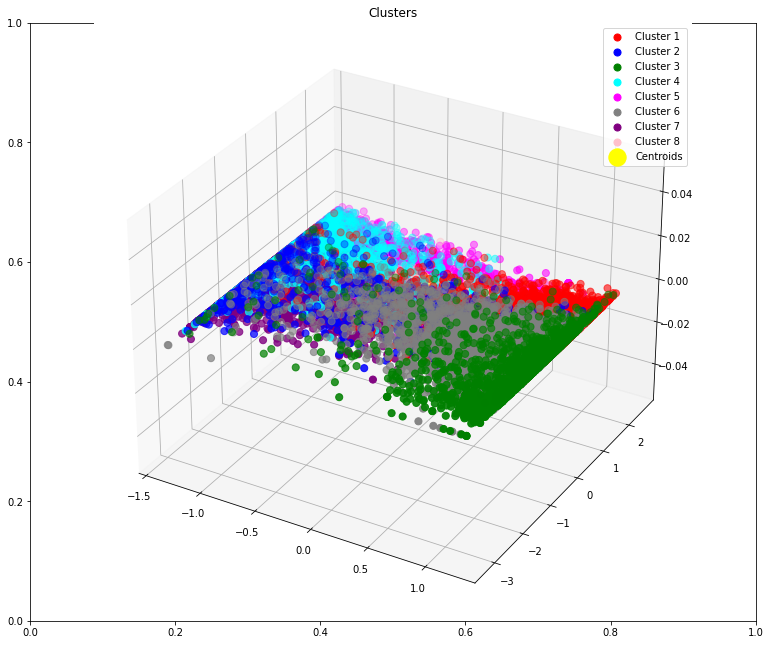

In [29]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_prep[y_kmeans == 0,0],X_prep[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(X_prep[y_kmeans == 1,0], X_prep[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(X_prep[y_kmeans == 2,0], X_prep[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(X_prep[y_kmeans == 3,0], X_prep[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(X_prep[y_kmeans == 4,0], X_prep[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(X_prep[y_kmeans == 5,0], X_prep[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(X_prep[y_kmeans == 6,0], X_prep[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(X_prep[y_kmeans == 7,0], X_prep[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=30)    
kmeans.fit(X_prep)
y_kmeans = kmeans.predict(X_prep)
y_kmeans

array([29, 29,  3, ...,  0,  5,  0])

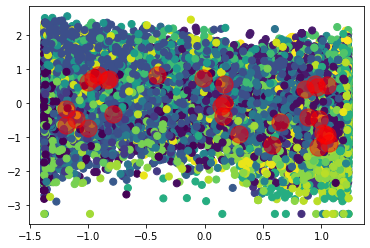

In [31]:
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)

In [32]:
from sklearn.cluster import DBSCAN


In [33]:
model = DBSCAN(eps=0.99, min_samples=8)
# fit model and predict clusters, I have tried with smaller epsilon but I was getting worse results in terms of noise on the plot
yhat = model.fit_predict(X_prep)

In [34]:
clusters1 = np.unique(yhat)
clusters1

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

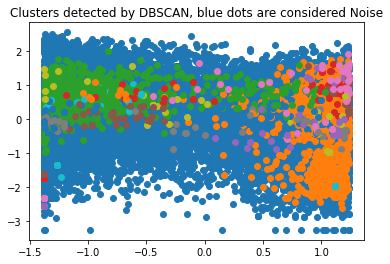

In [35]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
for cluster in clusters1:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    #X_df[x_df['clusters'] == cluster]
    # create scatter of these samples
    plt.scatter(X_prep[row_ix, 0], X_prep[row_ix, 1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.show()

In [36]:
#is possible that to get better results but for MVP I decided to keep the results on 30 clusters as on the first test

In [37]:
data["cluster"]=clusters
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year,cluster
name,,,,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,12,1920,0.0936,149.976,0.6340,1920,7
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,7,1920-01-05,0.0534,86.889,0.9500,1920,7
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,4,1920,0.1740,97.600,0.6890,1920,4
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422,1920,10
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990,1920,5


In [85]:
data.to_csv(r'Cluster_data.csv', index = False)


In [38]:
data2 = pd.read_csv('hottest_data.csv')
data2.head(20)

,song_title,artist_song
0,Heat Waves,Glass Animals
1,Booster Seat,Spacey Jane
2,The Difference,Flume and Toro y Moi
3,Cherub,Ball Park Music
4,Lost in Yesterday,Tame Impala
5,WAP,Cardi B featuring Megan Thee Stallion
6,Hyperfine,G Flip
7,Sending Me Ur Loving,The Jungle Giants
8,I'm Good?,Hilltop Hoods
9,Therefore I Am,Billie Eilish


In [41]:
num

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hybrid Origin (Year in Review 2020),0.007210,0.439,203612,0.937,0,0.895000,11,0.3300,-10.203,0,0,0.0447,131.992,0.0709,2021
TE MUDASTE,0.234000,0.811,130014,0.637,1,0.000572,10,0.1180,-4.835,0,90,0.0591,92.025,0.4710,2020
Blue Monday (Year in Review 2020),0.003790,0.646,206748,0.792,0,0.547000,7,0.2390,-8.355,1,0,0.0358,130.012,0.4270,2021


In [73]:
for col_num in num.columns: 
    print(col_num)

acousticness
danceability
duration_ms
energy
explicit
instrumentalness
key
liveness
loudness
mode
popularity
speechiness
tempo
valence
year


In [42]:
X_prep2 = StandardScaler().fit_transform(num)


In [43]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='8f76a1a9a0f14fc58d3e8e7a8b4fc9ed',
                                                           client_secret='60fac20c62744f18b8926760e23169fe' ))

In [44]:
for song in num.index:
    print(song)

Keep A Song In Your Soul
I Put A Spell On You
Golfing Papa
True House Music - Xavier Santos & Carlos Gomix Remix
Xuniverxe
Crazy Blues - 78rpm Version
Don't You Advertise Your Man
Arkansas Blues
La Chacarera - Remasterizado
Broken Puppet - Original Mix
Oouin
Desengaño - Remasterizado
Ta oula sou
Schumacher
Mparmpaouzos
To katinaki
Oli mera paizei zaria
El Africano - Remasterizado
Vre ti magkas pou eimai ego
Thelo na se lismoniso
On a Ragga Trip
Sirtó prevezániko
Big Rip
Sweet Reggae Music
True House Music - Original Massive Mix
Taro Yard Slaughter House
I photoúla, beráti
Serenade of the Bells
Comme à l'époque
Aidiniko
Bou Dou Ba Da Bouh
Day After - Original Mix
Oh Maurice
Jesus Paid It All
Voodoo Doll
Dancehall Good To Me
Penticton Kitty
Sweat (A La La La La Long)
Headbanger - Original Mix
Kexirr
Kansas City Man Blues - 78rpm Version
Ca N'vaut Pas L'amour
Mean Man
#NOHOOK
Brusque - Original Mix
Quantum Fluctuation
Cloud 9
Big Jim and the Twins
YP
Neráida, tsámiko
Ntourou Ntourou
Indio

Das ist bei uns nicht möglich, Kapitel 206
Το Βαγγελάκι
Θέλω τον κόσμο να χαρώ
Vegrinada
Romagnola
Часть 33.2 - Зеленые холмы Африки
Часть 30.3 - Зеленые холмы Африки
Mr Tom Hughes Town (137-A)
Reger: Variations and Fugue on a Theme of Mozart, Op. 132: V. Var. IV (Vivace)
Ei da, așa ceva
Casas Viejas - Remasterizado
Часть 4.2 - Зеленые холмы Африки
De-ar fi din lumea-ntreagă
Hot Fingers
Brahms: 21 Hungarian Dances, WoO 1: No. 5 in G Minor (Orchestral Version)
Garufa
El Retorno
Wagner: Lohengrin, WWV 75, Act 3: "Treulich geführt" (Bridal Chorus)
Часть 17.2 - Зеленые холмы Африки
Casas Viejas
Ami Purab Desher Puronari
Beethoven: Piano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brio
Gândește-te la mine
Panamá
Saddest Tale
De Kalb Blues (144-B)
Часть 66.2 - Зеленые холмы Африки
Das ist bei uns nicht möglich, Kapitel 2
Часть 32.6 & Часть 33.1 - Зеленые холмы Африки
Strauss, R: Salome, Op. 54,TrV 215: Dance of the Seven Veils
Часть 43.3 - Зеленые холмы Африки
Happy Birthday
Și pe tine

A Tree Grows in Brooklyn: I'll Buy You a Star
A Gal In Calico
Yesterdays
Conception
Out of This World: Prologue / I Jupiter, I Rex
Out of This World: Entrance of Juno: Hail, Hail, Hail / I Got Beauty
Solitaire
Billy Boy
A Tree Grows in Brooklyn: Growing Pains
Out of This World: Use Your Imagination
Who Says There Ain't No Santa Claus?
The Peddler's Serenade
Moonlight Bay (with Paul Weston & His Orchestra & The Norman Luboff Choir)
A Tree Grows in Brooklyn: That's How It Goes
Rock-Skippin' at the Blue Note
In The Cool Cool Cool Of The Evening
It's Good As New (I Painted It Blue)
Tra-La-La
Love Dance
Love For Sale
Out of This World: Where, Oh, Where?
Oh, Marie
Jungle Jalopy
Kinkajou
Out of This World: They Couldn't Compare to You
Aki And Ukthay
Prezervation
Smada
'S Wonderful
Lonesome Road
Here's To Your Illusions
The Donkey Serenade
I Love The Way You Say Goodnight
Heave Away, My Johnny
My Old Flame
Darktown Strutters' Ball
Najla's Lament
Ezz-Thetic
Birds / Enchantment
Barnacle Bill The

Rescue Me
I'll Be There - First Version
How Sweet It Is (To Be Loved By You)
Intro To Night In The City - Live at The 2nd Fret, Philadelphia, PA, 11/1966
I'm Only Sleeping - Remastered 2009
Intro To What's The Story Mr. Blue - Live at The 2nd Fret, Philadelphia, PA, 11/1966
Got To Get You Into My Life - Remastered 2009
The Time Is Now
I'm So Lonesome I Could Cry
Ferry Cross the Mersey - Stereo; 2002 Remaster
Land of 1000 Dances
Jet Black
Taxman - Remastered 2009
Forest Flower - Sunrise - Live@Monterey
Scarborough Fair / Canticle
It Was A Very Good Year - Live At The Sands, Las Vegas/1966
Here, There And Everywhere - Remastered 2009
It's Gonna Be Alright - Mono; 2002 Remaster
I Feel Free
Don't Ever Stray
Good Day Sunshine - Remastered 2009
The September Of My Years - Live At The Sands, Las Vegas/1966
My Generation - Mono Version
Girl on a Swing - 2008 Remaster
I Am a Rock
Shotgun
Silent Night
The End of the Rainbow - Stereo; 2008 Remaster
You Really Got a Hold on Me
The Carnival Is Over

I Love It Loud
Stop The Cavalry
Situation
Gypsy - 2016 Remaster
Mexican Radio
Wildfire
The Hellion
Rock This Town
I Will Survive - Rerecorded
Let It Whip
Little Guitars - 2015 Remaster
Atlantic City
Nobody
Romeo's Distress
Night, Pt. 2: Midnight
One On One
Ebony And Ivory - Remixed 2015
Olvídame y Pega la Vuelta
This Little Light of Mine
Night, Pt. 3: Minstrels
Wild in the Streets
The One You Love
I Won't Hold You Back
Rest Your Head
Marina Del Rey
Rip It Up
What's Forever For?
I.G.Y.
All We Ever Wanted Was Everything
You Are
Sailin' On
Prelude
Your House
Dear Prudence - Bonus Track
Where Have All the Good Times Gone! - 2015 Remaster
Sorry You're Sick
Heart to Heart
Ribbon In The Sky
Hot In The City
Night, Pt. 1: Snow
Dancing in the Street - 2015 Remaster
Layla
Stone Cold
Ojos Chinos
Some Children See Him
One
Peace
Whiskey On Ice
Redneck Girl
Don't Know What To Say (Don't Know What To Do)
The Lady in My Life
Row, Row, Row
Qué pasará mañana
Every Breath You Take
Uptown Girl
Sweet Dreams

The Thrill Is Gone
Been Around the World (feat. The Notorious B.I.G. & Mase)
Chan Chan
Superman's Dead
Invocation
Motorcycle Drive By
Shelf In The Room
I Can Love You
A Spoonful of Sugar - From "Mary Poppins" / Soundtrack Version
Faith
Ladies and Gentlemen We Are Floating in Space
Brick
No Weapon
Are U Still Down?
Step In Time - From "Mary Poppins"/Soundtrack Version
Honey, I'm Home
Engel
It's All About the Benjamins (feat. The Notorious B.I.G., Lil' Kim & The Lox) - Remix
Sister Christian
Angeles
Secuestro De Amor
Step into a World (Rapture's Delight)
Say Yes
Autumn Sweater
Echarme Al Olvido
All Along the Watchtower
Crush on You (feat. Lil' Cease) - Remix
Graduate
Landslide - Live at Warner Brothers Studios in Burbank, CA 5/23/97
Dig Up Her Bones
What Christmas Means To Me
Kiss the Girl - From "The Little Mermaid"/ Soundtrack Version
Amiga mía
Let Down
Hitchin' a Ride
The Perfect Drug
I'm Alright - Theme from "Caddyshack"
Coolie High
Pass Me Da Green
Jailhouse Rock
Breathe
No One Else

D# Fat (Mix Cut) - Original Mix
Power Trip (feat. Miguel)
The Next Ten Minutes
Santa Baby
Moving Too Fast
Safe And Sound
My Last Year
We Can't Stop
A Part of That
R U Mine?
Enigma - Extended Mix
Cocoa Butter Kisses
If I Didn't Believe in You
Hold On, We're Going Home
Clock, Time of Live!
Hail to the King
Climbing Uphill
Let It Go - From "Frozen"/Soundtrack Version
Void
Afraid
Forever Is Ours (Mix Cut)
Latch
This Is What It Feels Like (Mix Cut) - W&W Remix
Royals
Capacitor
Oceans (Where Feet May Fail)
On The Board
Rap God
The First Step
IV. Sweatpants
Goodbye Until Tomorrow / I Could Never Rescue You
Love Me
Fight For Your Dreams - Extended Mix
Ain't It Fun
Wham, Bam, Thank You, Mam - 2013 Remaster
You & I
Frederick's Bass Tester #33
From Time
Frederick's Bass Tester: One Minute Test
The Way
Frederick's Bass Tester #35
Last Christmas
Frederick's Bass Tester: UNLISTED (Part 2)
Bloom - Bonus Track
Frederick's Bass Tester: LIFE ON MARS (Part 2)
This Is How We Roll
Frederick's Bass Tester: 

input song:
1) if title is in data2 recommend hot song
/
2) elif title is not in data2 goes to data and provide 1 random recommendation based on the cluster
/
3) elif title is duplicate than input song artist and provide reccomendation based on the cluster
/
4) elif look for the song in API and based on the features find the corresponding cluster from our predictions and provide recommendation from the same cluster 
/
5) else the song is not on spotify and is not possible to provide recommendation



In [45]:
def prototype(X_prep2,kmeans):
    song = str(input ("Enter your song:"))
    if song in data2['song_title'].tolist():
        print("The song",song,"is Hot! Try this one too: ", str(random.choice(data2['song_title'])), "as it is also hot!")
    else:
      # look for the song in Spotify
        features = sp.search(q=song, limit=1) 
        my_dict = sp.audio_features(features["tracks"]["items"][0]["uri"])[0] #get the Spotify features of the song
        my_dict_new = { key:[my_dict[key]] for key in list(my_dict.keys()) }
    return my_dict_new
        #input_song = pd.DataFrame(my_dict_new)
        #input_song = input_song.drop('time_signature',axis=1) # get the dataframe of features
        #input_song = input_song.select_dtypes(np.number) #prepocess the input
        #song_scaled = X_prep2#.transform(input_song) #scaling the features
        #song_cluster = kmeans.predict(song_scaled)[0]
        #print('You favorite song is',song)
        #print('therefore,I have a recommendation for you! ', random.choice( data[data['cluster'] == int(song_cluster)]['name'].values )
        




In [46]:
# DEBUG HERE

def prototype(X_prep2,kmeans):
    song = str(input ("Enter your song:"))
    if song in data2['song_title'].tolist():
        print("The song",song,"is Hot! Try this one too: ", str(random.choice(data2['song_title'])), "as it is also hot!")
    else:
      # look for the song in Spotify
        features = sp.search(q=song, limit=1) # what is this producing? If was expected the song name to load features?
        my_dict = sp.audio_features((features["tracks"]["items"][0]["uri"])[0]) #get the Spotify features of the song
        my_dict_new = { key:[my_dict[key]] for key in list(my_dict.keys()) }
        return my_dict_new

In [47]:
data2['song_title']

0            Heat Waves
1          Booster Seat
2        The Difference
3                Cherub
4     Lost in Yesterday
            ...        
95           Germaphobe
96             Audacity
97             Your Man
98                 Itch
99                 Kool
Name: song_title, Length: 100, dtype: object

In [78]:
X_prep2

array([[ 1.21908873,  0.26761143, -0.51323168, ...,  1.09394568,
         0.32950379, -1.72436686],
       [ 0.30759397,  1.76402161, -0.68818408, ..., -0.97854425,
         1.56931174, -1.72436686],
       [ 1.22432721,  0.55628898, -0.55670686, ..., -0.62667398,
         0.54529315, -1.72436686],
       ...,
       [-1.36664905,  0.55039761, -0.14259269, ...,  0.43810234,
        -0.48264889,  1.73067831],
       [-1.0334558 , -1.29360392, -0.47116514, ...,  0.76287028,
        -1.64006454,  1.69646994],
       [-1.37646412, -0.40400574, -0.3904958 , ...,  0.43780668,
        -2.01906912,  1.73067831]])

In [79]:
kmeans

KMeans(n_clusters=30)

In [80]:
features

NameError: name 'features' is not defined

In [82]:
my_dict

{'danceability': 0.935,
 'energy': 0.454,
 'key': 1,
 'loudness': -7.509,
 'mode': 1,
 'speechiness': 0.375,
 'acousticness': 0.0194,
 'instrumentalness': 0,
 'liveness': 0.0824,
 'valence': 0.357,
 'tempo': 133.073,
 'type': 'audio_features',
 'id': '4Oun2ylbjFKMPTiaSbbCih',
 'uri': 'spotify:track:4Oun2ylbjFKMPTiaSbbCih',
 'track_href': 'https://api.spotify.com/v1/tracks/4Oun2ylbjFKMPTiaSbbCih',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4Oun2ylbjFKMPTiaSbbCih',
 'duration_ms': 187541,
 'time_signature': 4}

In [ ]:
#my_dict.pop('type','id', 'uri', 'track_href','analysis_url','time_signature' )


In [83]:
my_dict_new

{'danceability': [0.935],
 'energy': [0.454],
 'key': [1],
 'loudness': [-7.509],
 'mode': [1],
 'speechiness': [0.375],
 'acousticness': [0.0194],
 'instrumentalness': [0],
 'liveness': [0.0824],
 'valence': [0.357],
 'tempo': [133.073],
 'type': ['audio_features'],
 'id': ['4Oun2ylbjFKMPTiaSbbCih'],
 'uri': ['spotify:track:4Oun2ylbjFKMPTiaSbbCih'],
 'track_href': ['https://api.spotify.com/v1/tracks/4Oun2ylbjFKMPTiaSbbCih'],
 'analysis_url': ['https://api.spotify.com/v1/audio-analysis/4Oun2ylbjFKMPTiaSbbCih'],
 'duration_ms': [187541],
 'time_signature': [4]}

In [48]:
results = sp.search(q='WAP', limit=5)
#results
json_results = json.dumps(results, ensure_ascii=True)
json_results  


'{"tracks": {"href": "https://api.spotify.com/v1/search?query=WAP&type=track&offset=0&limit=5", "items": [{"album": {"album_type": "single", "artists": [{"external_urls": {"spotify": "https://open.spotify.com/artist/4kYSro6naA4h99UJvo89HB"}, "href": "https://api.spotify.com/v1/artists/4kYSro6naA4h99UJvo89HB", "id": "4kYSro6naA4h99UJvo89HB", "name": "Cardi B", "type": "artist", "uri": "spotify:artist:4kYSro6naA4h99UJvo89HB"}, {"external_urls": {"spotify": "https://open.spotify.com/artist/181bsRPaVXVlUKXrxwZfHK"}, "href": "https://api.spotify.com/v1/artists/181bsRPaVXVlUKXrxwZfHK", "id": "181bsRPaVXVlUKXrxwZfHK", "name": "Megan Thee Stallion", "type": "artist", "uri": "spotify:artist:181bsRPaVXVlUKXrxwZfHK"}], "available_markets": ["AD", "AE", "AG", "AL", "AM", "AR", "AT", "AU", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BN", "BO", "BR", "BS", "BT", "BW", "BY", "BZ", "CA", "CH", "CL", "CM", "CO", "CR", "CV", "CW", "CY", "CZ", "DE", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "E

In [69]:
#From Ignacio lesson, how to cast a song to a dataframe from Spotify using sp to retrieve the features 

WAP = sp.search(q='WAP', limit=1) 
WAP["tracks"]["items"][0]["uri"]
my_dict = sp.audio_features(WAP["tracks"]["items"][0]["uri"])[0] # my_dict is now a dictionary

#my_dict
# Change it to a pandas dataframe
my_dict_new = { key:[my_dict[key]] for key in list(my_dict.keys()) }
features_data=pd.DataFrame(my_dict_new)
features_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.935,0.454,1,-7.509,1,0.375,0.0194,0,0.0824,0.357,133.073,audio_features,4Oun2ylbjFKMPTiaSbbCih,spotify:track:4Oun2ylbjFKMPTiaSbbCih,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,https://api.spotify.com/v1/audio-analysis/4Oun...,187541,4


In [72]:
# when should I drop the columns that I do not need because they do not match? How do I bring the data from API to my dataframe 
# and import predictions?

for col in features_data.columns: 
    print(col)

danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
type
id
uri
track_href
analysis_url
duration_ms
time_signature


In [70]:
my_dict_new

{'danceability': [0.935],
 'energy': [0.454],
 'key': [1],
 'loudness': [-7.509],
 'mode': [1],
 'speechiness': [0.375],
 'acousticness': [0.0194],
 'instrumentalness': [0],
 'liveness': [0.0824],
 'valence': [0.357],
 'tempo': [133.073],
 'type': ['audio_features'],
 'id': ['4Oun2ylbjFKMPTiaSbbCih'],
 'uri': ['spotify:track:4Oun2ylbjFKMPTiaSbbCih'],
 'track_href': ['https://api.spotify.com/v1/tracks/4Oun2ylbjFKMPTiaSbbCih'],
 'analysis_url': ['https://api.spotify.com/v1/audio-analysis/4Oun2ylbjFKMPTiaSbbCih'],
 'duration_ms': [187541],
 'time_signature': [4]}

In [51]:
my_dict_new.keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [59]:
music_features = ['danceability', 'energy', 'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo']

In [60]:
music_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [77]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
0,1.219089,0.267611,-0.513232,-0.914565,-0.276663,-0.515509,-0.052755,1.049431,-0.204238,-1.599600,-0.989153,-0.022404,1.093946,0.329504,-1.724367,7
1,0.307594,1.764022,-0.688184,0.196749,-0.276663,-0.432581,-0.052755,-0.718780,0.804761,-1.599600,-1.181903,-0.267064,-0.978544,1.569312,-1.724367,7
2,1.224327,0.556289,-0.556707,-1.058694,-0.276663,-0.517125,-1.489049,1.879856,-0.104598,0.625156,-1.297553,0.466917,-0.626674,0.545293,-1.724367,4
3,-1.376123,1.045273,1.935060,1.262549,-0.276663,2.049657,-0.914532,-0.439401,0.795361,0.625156,-0.796403,-0.333403,0.371907,-1.992390,-1.724367,10
4,-0.603901,0.892098,-0.543228,0.917397,3.614512,-0.516393,1.383539,1.185858,1.035061,-1.599600,-1.374654,-0.124650,0.177394,-0.984850,-1.724367,5


In [ ]:
temp = prototype(X_prep2,kmeans)

In [ ]:
temp


In [ ]:
temporary_dict={k:v for k,v in temp.items() if  k in data}

In [ ]:
temporary_dict

In [ ]:
temporary_dict.values()

In [ ]:
keys

In [ ]:
#I use the array from the dict I pass it to kmean, kmean return a cluster and I use the cluster to suggest another song 
#it might be that the values in temp dict will not work in predict till they are in lists and we might need to extract 
#them one by one 